## Covid-19 Data
Data obtained from the New York Times: 

https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv 

https://github.com/nytimes/covid-19-data/blob/master/us-states.csv

In [144]:
import io
import pandas as pd
import numpy as np
import scipy as sp
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
from matplotlib.ticker import AutoMinorLocator

In [145]:
%matplotlib inline

In [146]:
url_counties = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
url_states = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
cdata = pd.read_csv(url_counties)
sdata = pd.read_csv(url_states)
sdata['date'] = pd.to_datetime(sdata['date'])

### Total Reported US Cases

In [147]:
national = sdata.groupby(['date'])[['cases', 'deaths']].sum()
national.index.name = None
national['CFR'] = round(national['deaths'] / national['cases'], 3)
print(national.sort_index(ascending=False).head(n=7))

             cases  deaths    CFR
2020-03-31  187834    3910  0.021
2020-03-30  163796    3073  0.019
2020-03-29  142161    2486  0.017
2020-03-28  123628    2134  0.017
2020-03-27  102648    1649  0.016
2020-03-26   85533    1275  0.015
2020-03-25   68515     990  0.014


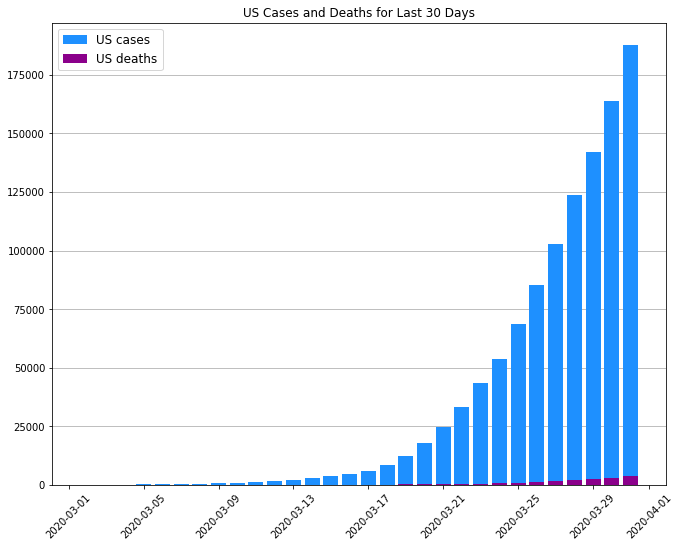

In [148]:
days = 30

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
ax.bar(national.index[-days:], national.iloc[-days:]['cases'], label="US cases", color='dodgerblue')
ax.bar(national.index[-days:], national.iloc[-days:]['deaths'], label="US deaths", color='darkmagenta')
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.xticks(rotation=45, fontsize='medium')
plt.title("US Cases and Deaths for Last %d Days" % days)
plt.legend(loc=2, fancybox=True, fontsize='large')
plt.show()

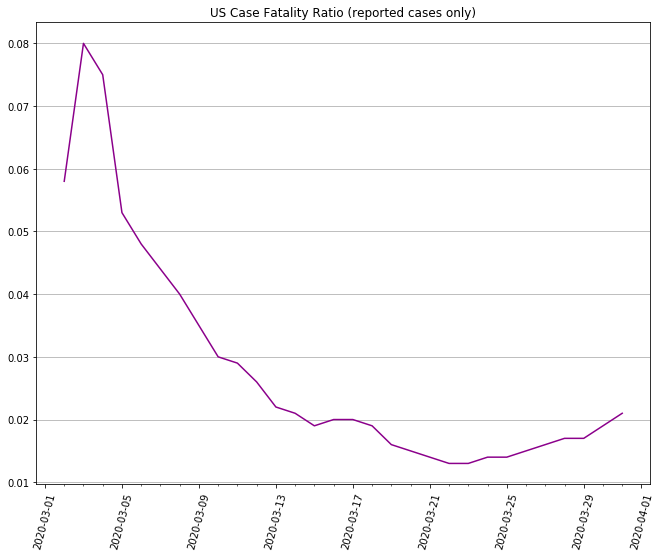

In [149]:
days = 30

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
ax.plot(national.index[-days:], national.iloc[-days:]['CFR'], color='darkmagenta')
plt.title("US Case Fatality Ratio (reported cases only)")
plt.xticks(rotation=75)
ax.grid(axis='y')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_axisbelow(True)
plt.show()

### States with the Most Cases

In [150]:
yesterday = '2020-03-30'
plot_states = sdata[sdata['date'] == yesterday].sort_values('cases', ascending=False).iloc[:10]['state'].tolist()

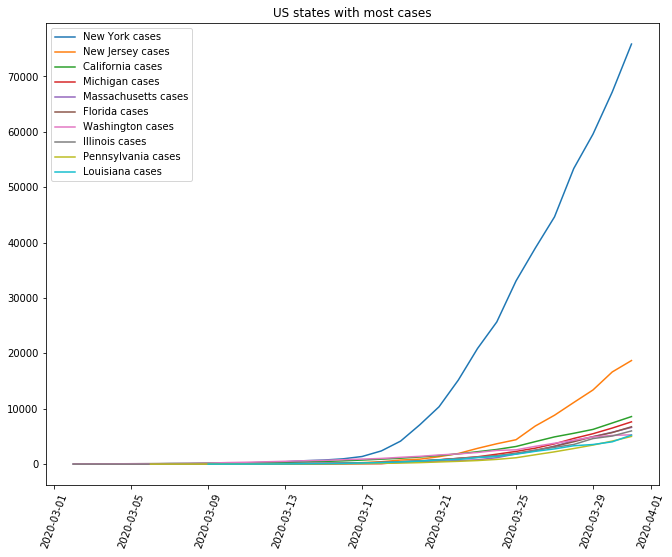

In [151]:
days = 30
fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
for st in plot_states:
    x = sdata[sdata['state'] == st].sort_values('date', ascending=True).iloc[-days:]['date']
    y = sdata[sdata['state'] == st].sort_values('date', ascending=True).iloc[-days:]['cases']
    ax.plot(x, y, label='%s cases' % st, color=colors[plot_states.index(st)])

plt.legend(loc=2, fancybox=True)
plt.title("US states with most cases")
plt.xticks(rotation=70)
plt.show()

### County + State Data 
Enter the state and county names in the following cell. Run the next two cells to see relevant state/county data.

In [152]:
state_name = 'California'
county_name = 'Santa Cruz'
days = 30

Santa Cruz County
2020-03-31: 49 cases, 1 deaths


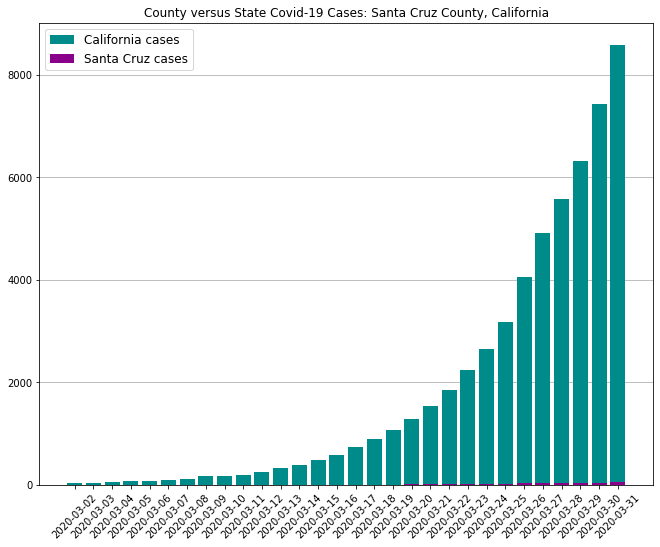

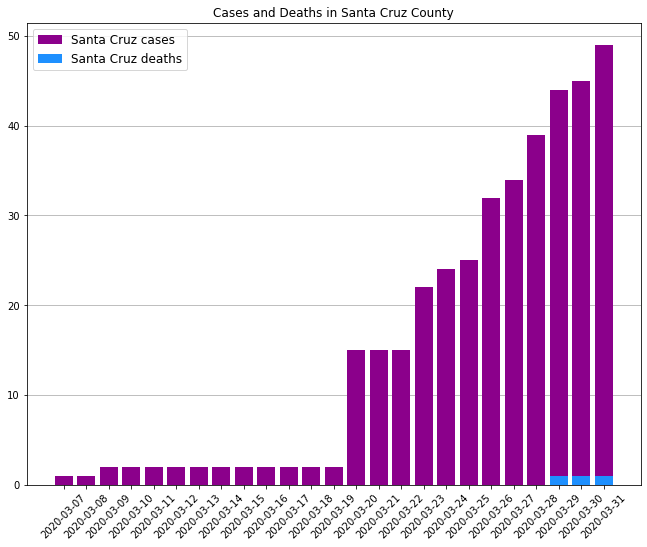

In [154]:
dfcounties = cdata[cdata['state'] == state_name]
dfstate = dfcounties.groupby(['date'])[['cases', 'deaths']].sum()

if county_name in dfcounties['county'].tolist():
    coflag = 1
    dfco = dfcounties[dfcounties['county'] == county_name]
    latest = dfco.iloc[-1].tolist()
    print(latest[1], "County")
    print("{}: {} cases, {} deaths".format(latest[0], latest[4], latest[5]))
    title = "County versus State Covid-19 Cases: {} County, {}".format(county_name, state_name)
else: 
    coflag = 0
    latest = dfstate.iloc[-1]
    print("{}\n{}: {} cases, {} deaths".format(state_name, latest.name, latest.cases, latest.deaths))
    title = "Covid-19 Cases in {}".format(state_name)

# plot state cases vs county cases
fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
ax.bar(dfstate.index.tolist()[-days:], 
       dfstate.iloc[-days:]['cases'], 
       label="%s cases" % state_name, 
       color='darkcyan')
if coflag:
    ax.bar(dfco[dfco['county'] == county_name].iloc[-days:]['date'], 
           dfco[dfco['county'] == county_name].iloc[-days:]['cases'], 
           label='%s cases' % county_name, 
           color='darkmagenta')
else:
    ax.bar(dfstate.index.tolist()[-days:],
           dfstate.iloc[-days:]['deaths'],
           label="%s deaths" % state_name,
           color='darkslategrey')
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.title(title)
plt.xticks(rotation=45, fontsize='medium')
plt.legend(loc=2, fancybox=True, fontsize='large')
plt.show()

# plot county cases vs deaths
if coflag:
    fig1, ax1 = plt.subplots()
    fig1.set_size_inches(11, 8.5)
    ax1.bar(dfco[dfco['county'] == county_name]['date'], 
           dfco[dfco['county'] == county_name]['cases'], 
           label='%s cases' % county_name, 
           color='darkmagenta')
    ax1.bar(dfco[dfco['county'] == county_name]['date'], 
           dfco[dfco['county'] == county_name]['deaths'], 
           label='%s deaths' % county_name, 
           color='dodgerblue')
    ax1.grid(axis='y')
    ax1.set_axisbelow(True)
    plt.title("Cases and Deaths in {} County".format(county_name))
    plt.xticks(rotation=45, fontsize='medium')
    plt.legend(loc=2, fancybox=True, fontsize='large')
    plt.show()
